# Анализ поведения пользователей в приложении "Ненужные вещи"

"Ненужные вещи" - интернет-сервис для размещения объявлений о товарах, где продавец выкладывает свой товар, а пользователь может найти нужную ему вещь и купить  

Пользователь может совершать различные действия в сервисе, например: открыть объявление, посмотреть фотографии, добавить в избранное, посмотреть контакты продавца и совершить звонок продавцу  

Сервис не берет процент от успешных сделок, продавец полностью получает оплату. Наша монетизация завязана на продвижении объявлений в поисковом запросе. Продавцы могут приобрести премиальную функцию, чтобы его объявление выдавалось в топе запросов и тем самым увеличив шансы на быструю продажу  



### Материалы

[Презентация](https://drive.google.com/file/d/1TCAfp5qc9-RsPpC6dIBLEH0Mb1chU0pN/view?usp=sharing)  
[Дашборд](https://public.tableau.com/app/profile/aleksei4603/viz/Dashboardbyproject/Dashboard1?publish=yes)

**Цель исследования**  

Заказчик - продукт менеджер. Нам необходимо узнать, какая аудитория находится в приложении. Есть ли отдельные сценарии, при которых в дальнейшем, пользователей можно будет сегментировать. По результатам нашего исследования будут работать с вовлеченностью пользователей. 

**Определить:**  

* Какие события влияют на конверсию в целевое действие?
* Какие сценарии использования приложения выделяются?
* Как различается время между распространенными событиями пользователей?

**Обзов данных**

* Открыть таблицы и изучить общую информацию о данных

**Предобработка данных** 

* Проверить датасеты на пропуски
* Заменить названия столбцов, если нужно и привести к правильному стилю
* Если в данных присутствуют дубликаты, их нужно обработать 
* При необходимости, изменить типы данных
* Обединить таблицы в один датасет


**Исследовательский анализ данных**  

1. Общий анализ по пользователям и событиям

2. Проанализировать связь целевого события ``просмотра контактов`` — и других действий пользователей  
   * Определить сессии
   * Построить матрицу корреляций
   * Просмотреть, какие сценарии существуют
   * Определить самые популярные сценарии


3. Оценить, какие действия чаще совершают те пользователи, которые просматривают контакты  
   * Построить воронку по самым популярным сценариям с целевым событием
   * Проанализировать влияние событий на совершение целевого события
   * Просчитать конверсию по каждому событию в целевое действие
   * Замерить время по каждому событию и переходом в целевое событие
   


**Формулировка гипотез**  

1. Одни пользователи совершают действия ``tips_show`` и ``tips_click``, другие — только ``tips_show``. Проверить гипотезу: конверсия в просмотры контактов различается у этих двух групп.

2. Пользователи могут совершить целевое действие после того, как добавят объявление в избранное, а могут и сразу  
Нулевая гипотеза: конверсия в целевое действие не отличается у пользователей, кто добавил избранное, а кто нет  
Альтернативная гипотеза: конверсия в целевое действие отличается у пользователей

**Сделать общий вывод**  
По результатам исследования дать рекомендации по возможным сценариям, которые проходят пользователи, чтобы совершить целевое действие. Предложить максимально результативный сценарий

## Обзор данных

In [1]:
#!pip install --user --upgrade pandas

In [2]:
#Для начала загрузим необходимые библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import math as mth
from scipy import stats as st
from plotly import graph_objects as go
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#Округлим числовые значения до сотых
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#Загрузим 2 датасета 

sources = pd.read_csv('/Users/alekseivlasov/Desktop/project/12/mobile_sourсes.csv')
dataset = pd.read_csv('/Users/alekseivlasov/Desktop/project/12/mobile_dataset.csv')

Просмотрим общую информацию по каждой таблице, чтобы познакомиться

In [5]:
#Первый датасет
sources.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [6]:
print(sources.shape)
sources.info()

(4293, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


Размер первого датасета: 2 колонки и 4293 строки  
Пропусков нет, тип данных у каждой колонки ``object``  
Нужно будет привести название к правильному стилю

In [7]:
#Второй датасет
dataset.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [8]:
print(dataset.shape)
dataset.info()

(74197, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


Размер второго датасета: 3 колонки и 74 197 строк  
Пропусков также нет, тип данных нужно поменять в столбце ``event.time`` и привести название колонок к правильному стилю

## Предобработка данных

Начнем с первого датасета  
При обзоре данных пропуски не обнаружили, поэтому переходим к приведению столбцов к правильному стилю

In [9]:
#Нужно исправить колнку userId
sources = sources.rename(columns={'userId':'user_id'})
sources.columns

Index(['user_id', 'source'], dtype='object')

In [10]:
#Проверим на дубликаты
sources.duplicated().sum()

0

Явных дубликатов в первой таблице не обнаружено

In [11]:
sources['source'].value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

В колонке ``source`` 3 значения

Тип данных изменять здесь не нужно, поэтому переходим к предобработке второго датасета

In [12]:
#Приведем колонки к правильному стилю
dataset = dataset.rename(columns=
                        {'event.time':'event_time', 'event.name':'event_name', 'user.id':'user_id'}
)
dataset.columns

Index(['event_time', 'event_name', 'user_id'], dtype='object')

In [13]:
#Поверим датасет на наличие дубликатов
dataset.duplicated().sum()

0

Дубликатов тоже нет

In [14]:
dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

``contacts_show`` и ``show_contacts`` одно и тоже, поэтому приведем к одному названию, и объединими все ``search`` в один

In [15]:
dataset['event_name'] = dataset['event_name'].replace('show_contacts', 'contacts_show')

In [16]:
dataset['event_name'] = dataset['event_name'].replace({'search_1':'search', 'search_2':'search',
                                                      'search_3':'search', 'search_4':'search',
                                                      'search_5':'search', 'search_6':'search',
                                                      'search_7':'search'})
dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

От неявных дубликатов избавились, теперь нужно поменять типы данных

In [17]:
dataset['event_time'] = pd.to_datetime(dataset['event_time'], format= '%Y-%m-%d %H:%M:%S.%f')

dataset['event_time'].head(1)

0   2019-10-07 00:00:00.431357
Name: event_time, dtype: datetime64[ns]

Обединим 2 таблицы в одну, для дальнейшего исследования

In [18]:
df_oll = dataset.merge(sources, on='user_id', how='outer')
df_oll.head()

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other


**Вывод**  

Мы завершили предобработку данных    
* Проверили на наличие пропусков - их не обнаружили
* Привели название колонок к правильному стилю
* Сделали проверку на явные и неявные дубли
* Измнили тип данных
* Обединили 2 датасета в один

## Исследовательский анализ данных

Посмотрим, сколько у нас пользователей и событий в датасете

In [19]:
print('Количество пользователей =', df_oll['user_id'].nunique())
print('Количество событий =', df_oll['event_name'].count())

Количество пользователей = 4293
Количество событий = 74197


Посмотрим на характер распределение данного показателя через describe

In [20]:
event_users = df_oll.groupby('user_id')['event_name'].count()
event_users.describe()


count   4,293.00
mean       17.28
std        29.13
min         1.00
25%         5.00
50%         9.00
75%        17.00
max       478.00
Name: event_name, dtype: float64

Среднее количество событий на одного пользователя: 17  
Миниальное количество событий: 1  
Максимальное количество событий: 478 (это очень активные пользователи)

Нам нужно узнать, за какой период у нас есть данные

In [21]:
print('Период =', df_oll['event_time'].max() - df_oll['event_time'].min())

Период = 27 days 23:58:12.101130


Почти 28 дней

Посчитаем сколько пользователей совершали ``contacts_show``

In [22]:
contacts_show_users = df_oll.query('event_name == "contacts_show"')['user_id'].nunique()
print('Количество пользователей, которые совершили целевое событие =', contacts_show_users)

Количество пользователей, которые совершили целевое событие = 981


Целевое событие - просмотр номера телефона  
Проанализируем связь целевого события и других действий пользователя

Для начала определим сессии для каждого пользователя, границей сделаем 1 час  

In [23]:
g = (df_oll.groupby('user_id')['event_time'].diff() > pd.Timedelta('1Hour')).cumsum()
#Добавим новую колонку
df_oll['session_id'] = df_oll.groupby(['user_id', g], sort=False).ngroup() + 1
df_oll.head()

,event_time,event_name,user_id,source,session_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,1
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,1
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1


**Сессии определили, теперь построим матрицу корреляций**  
Для начала соберем нужную таблицу

In [24]:
events = df_oll.pivot_table(columns='event_name', index='session_id', values='user_id', aggfunc='count')
events.head()

event_name,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search,tips_click,tips_show
session_id,,,,,,,,,
1,10.00,NaN,NaN,NaN,3.00,NaN,NaN,NaN,15.00
2,10.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,14.00
3,3.00,NaN,NaN,NaN,1.00,NaN,1.00,NaN,3.00
4,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.00
5,NaN,NaN,NaN,NaN,5.00,NaN,3.00,NaN,13.00


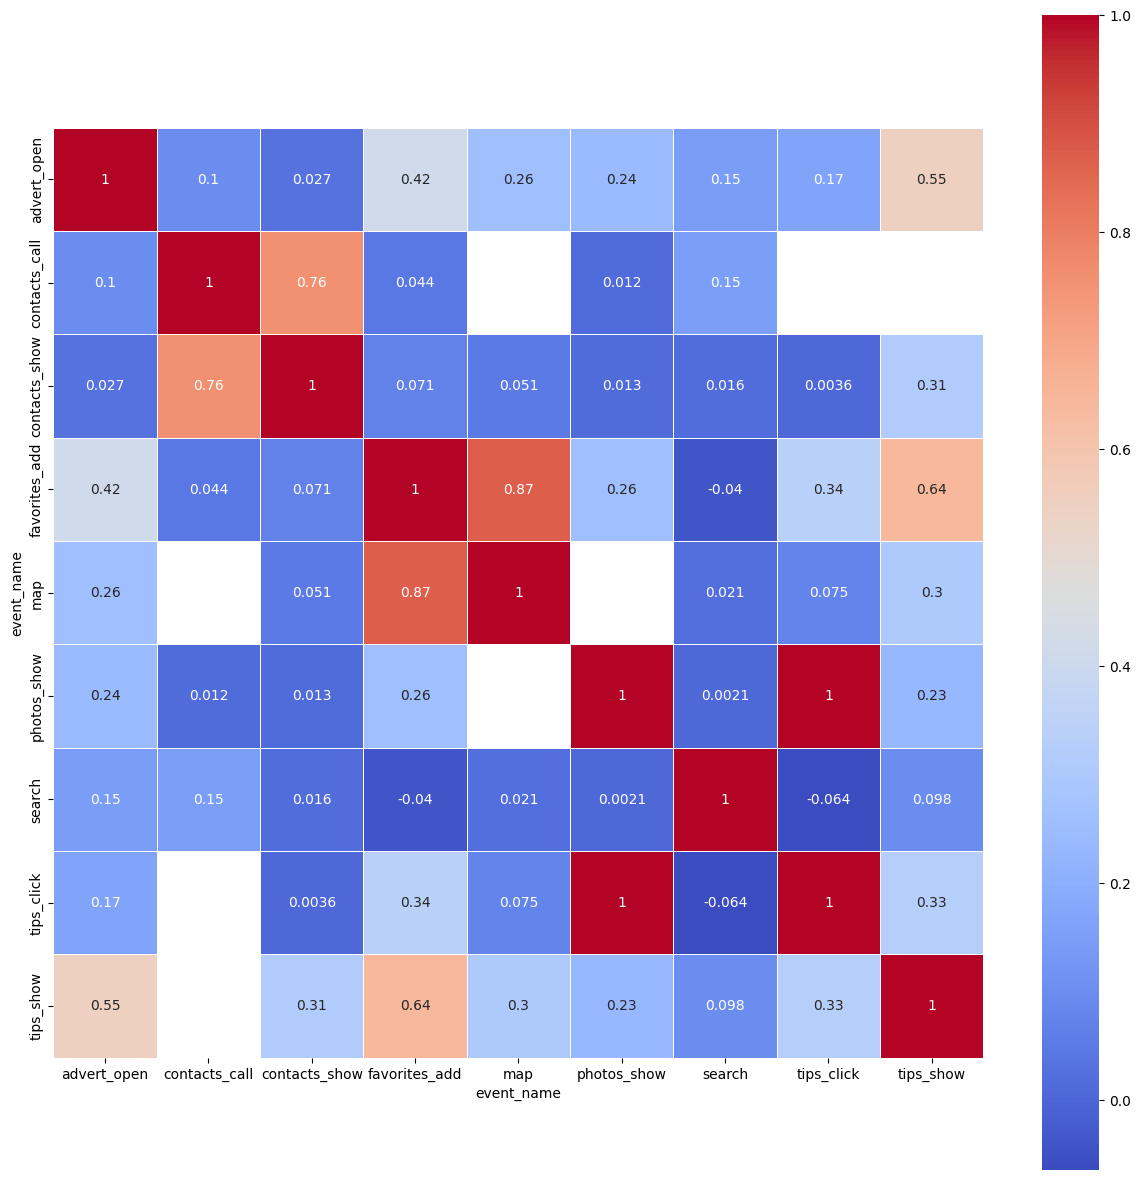

In [25]:
#Строим матрицу корреляций
cm = events.corr()
fig, ax = plt.subplots(figsize=[15,15])
sns.heatmap(cm, annot=True, square=True, linewidths=.5, cmap='coolwarm')
plt.show()

Мы наблюдаем сильную корреляцию с событием ``contacts_call``, но оно происходит после целевого действия  
Также сильная корреляция с событием ``favorites_add``

Для каждой сессии есть свой уникальный список событий, определим под каждую сессию уникальные события

In [26]:
event_unique = df_oll.groupby('session_id').agg(event_unique=('event_name', 'unique')).reset_index()
event_unique.head(10)

,session_id,event_unique
0,1,"[advert_open, tips_show, map]"
1,2,"[tips_show, advert_open, tips_click]"
2,3,"[advert_open, tips_show, search, map]"
3,4,"[tips_show, advert_open]"
4,5,"[tips_show, map, search]"
5,6,[tips_show]
6,7,"[tips_show, map, advert_open, tips_click]"
7,8,"[advert_open, tips_show]"
8,9,"[tips_show, contacts_show, tips_click]"
9,10,"[search, map, tips_show, tips_click]"


Мы сделали уникальный сценарий под каждую сессию, теперь определим самые популярные, которые чаще всего встречаются

In [27]:
event_unique['event_unique'] = event_unique['event_unique'].apply(lambda x: str(x))
event_count = event_unique['event_unique'].value_counts().reset_index()
event_count.head(20)

,index,event_unique
0,['tips_show'],2331
1,['photos_show'],1198
2,['search'],695
3,['map' 'tips_show'],527
4,['search' 'photos_show'],508
5,['search' 'tips_show'],401
6,['tips_show' 'contacts_show'],305
7,['tips_show' 'map'],193
8,['contacts_show'],171
9,['map' 'advert_open' 'tips_show'],162


* Самый популярный сценарий пользователя - просмотр рекомендованных объявлений
* На 7 месте видим сценарий, в котором присутствует целевое действие - увидел рекомендованное объявление и посмотрел номер телефона - в датасете такой сценарий повторили 305 раз  
* Также видим сценарий, где пользователь только просмотрел контакт, скорей всего, он его ранее добавил в избранное и через время, когда сессия закончилась - прозвонил  
* Есть сценарий, который совершили 90 раз - открыл карту объявлений, увидел рекомендованные объявления и посмотрел номер телефона

Мы определили самые популярные сценарии с целевым действием,теперь можем простроить воронки  
Начнем с первого сценария: увидел рекомендованное объявление и посмотрел номер телефона 

In [28]:
#Посчитаем количество событий для воронки

tips_show_list = df_oll.query('event_name == "tips_show"')['user_id'].unique()
tips_show_contacts_show_list = df_oll.query(
    'user_id in @tips_show_list and event_name == "contacts_show"')['user_id'].unique()

print('Количество пользователей, которые совершили событие tips_show =',len(tips_show_list))
print('Количество пользователей, которые совершили событие contacts_show =',len(tips_show_contacts_show_list))

Количество пользователей, которые совершили событие tips_show = 2801
Количество пользователей, которые совершили событие contacts_show = 516


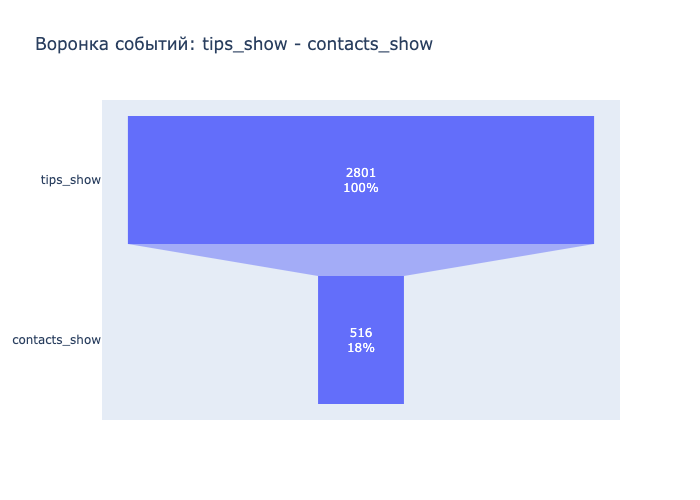

In [29]:
#Строим воронку по этиv событиям
fig = go.Figure(go.Funnel(
    y = ['tips_show', 'contacts_show'],
    x = [len(tips_show_list), len(tips_show_contacts_show_list)],
    textposition = 'inside',
    textinfo = 'value+percent initial'

))

fig.update_layout(title_text = 'Воронка событий: tips_show - contacts_show')
fig.show('png')

Мы видим, что конверсия перехода от события ``tips_show`` 18.4% построим еще воронку с другими событиями, чтобы посмотреть лучшую комбинацию 

Следующий сценарий: map - tips_show - contacts_show

In [30]:
map_list = df_oll.query('event_name == "map"')['user_id'].unique()
map_tips_show_list = df_oll.query('user_id in @map_list and event_name == "tips_show"')['user_id'].unique()
map_tips_show_contacts_show_list = df_oll.query(
    'user_id in @map_tips_show_list and event_name == "contacts_show"')['user_id'].unique()

print('Количество пользователей, которые совершили событие map =',len(map_list))
print('Количество пользователей, которые совершили событие tips_show =',len(map_tips_show_list))
print('Количество пользователей, которые совершили событие contacts_show =',len(map_tips_show_contacts_show_list))

Количество пользователей, которые совершили событие map = 1456
Количество пользователей, которые совершили событие tips_show = 1352
Количество пользователей, которые совершили событие contacts_show = 275


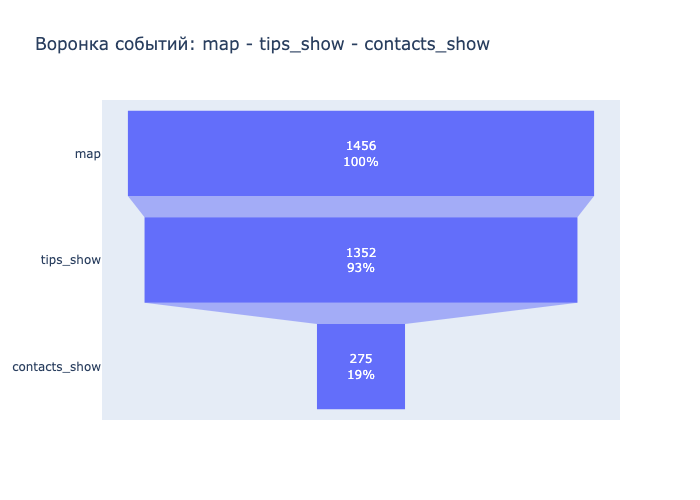

In [31]:
#Построим воронку

fig = go.Figure(go.Funnel(
    y = ['map', 'tips_show', 'contacts_show'],
    x = [len(map_list), len(map_tips_show_list), len(map_tips_show_contacts_show_list)],
    textposition = 'inside',
    textinfo = 'value+percent initial'
))
fig.update_layout(title_text = 'Воронка событий: map - tips_show - contacts_show')
fig.show('png')

Конверсия по предыдущему событию выше, чем в первом сценарии - 20.3%  
Конверсия от первого события состовляет: 18,9%

**Воронки по самым популярным сенариям построили, теперь посчитаем конверсию из каждого события в целевое**

In [32]:
#Соберем список из событий
events_name = list(df_oll['event_name'].unique())
events_name.remove('contacts_show')
events_name

['advert_open',
 'tips_show',
 'map',
 'tips_click',
 'search',
 'photos_show',
 'favorites_add',
 'contacts_call']

In [33]:
#Через цикл посмотрим конверсии по каждому событию в целевое событие
for i in events_name:
    one_list = df_oll.query('event_name == @i')['user_id'].unique()
    two_list = df_oll.query(
        'user_id in @one_list and event_name == "contacts_show"')['user_id'].unique()

    print(f'Конверсия {i} - contacts_show {round((len(two_list)/len(one_list))* 100, 1)}%')

Конверсия advert_open - contacts_show 18.4%
Конверсия tips_show - contacts_show 18.4%
Конверсия map - contacts_show 19.8%
Конверсия tips_click - contacts_show 31.1%
Конверсия search - contacts_show 22.6%
Конверсия photos_show - contacts_show 31.0%
Конверсия favorites_add - contacts_show 38.7%
Конверсия contacts_call - contacts_show 100.0%


Самая высокая конверсия с событием ``favorites_add`` - 38.7% и также сильная корреляция  
На это событие стоит обратить пристальное внимание  
Второе место у события ``photos_show`` - 31%, что говорит о том, что после просмотра товара появляется желание связаться с продавцом, чтобы купить  
У нас еще есть конверсия 100% по событию ``contacts_call``, так как оно проходит после целевого

**Посмотрим, как различается время между распространенными событиями пользователей**

Создадим функцию, которая будет счтитать время между событиями внутри сессии

In [34]:
def time_between(e_1, e_2):
    #выделим сессии, в которых встречаются оба события
    event_1 = df_oll[df_oll['event_name'] == e_1]
    list_1 = event_1['session_id'].unique()
    
    event_2 = df_oll[df_oll['event_name'] == e_2]
    list_2 = event_2['session_id'].unique()
    
    events_list = set(list(set(list_1) & set(list_2))) #найдем пересечение событий
    event_1_2 = df_oll[df_oll['session_id'].isin(events_list)] #отфильтруем по списку
    
    #удалим лишние события из датасета
    event_1_2 = event_1_2.query('event_name == @e_1 | event_name == @e_2')
    
    #найдем минимальную дату первого события внутри сессии и минимальную дату второго события
    event_1_2 = pd.pivot_table(event_1_2, values='event_time', index='session_id', columns='event_name')
    
    #удалим события в обратной последовательности
    event_1_2['diff'] = event_1_2[e_2] - event_1_2[e_1]
    #удалим лишние строки
    event_1_2.drop(event_1_2[event_1_2[e_1] > event_1_2[e_2]].index, inplace = True)
    #переведем интервал в секунды
    event_1_2['diff'] = event_1_2['diff'].apply(lambda x: x.total_seconds())
    
    return(event_1_2)

Посчитаем среднее время и медиану по событиями и целевому действию

In [35]:
#Сделаем это через цикл
for i in events_name:
    event = time_between(i, 'contacts_show')
    print(f'Среднее время между {i} и contacts_show =', round(event['diff'].mean() / 60, 2), 'минут')
    print(f'Медиана между {i} и contacts_show =', round(event['diff'].median() / 60, 2), 'минут')
    print()

Среднее время между advert_open и contacts_show = 14.72 минут
Медиана между advert_open и contacts_show = 6.39 минут

Среднее время между tips_show и contacts_show = 9.1 минут
Медиана между tips_show и contacts_show = 5.24 минут

Среднее время между map и contacts_show = 16.72 минут
Медиана между map и contacts_show = 9.73 минут

Среднее время между tips_click и contacts_show = 18.2 минут
Медиана между tips_click и contacts_show = 10.92 минут

Среднее время между search и contacts_show = 14.18 минут
Медиана между search и contacts_show = 6.6 минут

Среднее время между photos_show и contacts_show = 11.69 минут
Медиана между photos_show и contacts_show = 5.07 минут

Среднее время между favorites_add и contacts_show = 13.08 минут
Медиана между favorites_add и contacts_show = 5.83 минут

Среднее время между contacts_call и contacts_show = 5.96 минут
Медиана между contacts_call и contacts_show = 3.27 минут



Среднее подверженно выбросам, поэтому вывод будем делать по медиане:  
Быстрее всего пользовтель принимает решение открыть контакт продавца после просмотра фото

**Вывод:**  

* Мы определили сессии для каждого пользователя, границей сделали 1 час
* Построили матрицу корреляций, где обнаружили сильную корреляцию с событием ``favorites_add``
* Собрали уникальные сценарии и выбралии самые популярные с целевым действием
* Из двух сценариев лучше показал себя: ``map - tips_show - contacts_show``, на нем нужно делать упор, так как действий здесь совершенно меньше, но конверсии выше, хоть и незначительно
* Просчитали конверсию по каждому событию отдельно: Самая высокая конверсия с событием ``favorites_add`` - 38.7% и также сильная корреляция
* Второе место у события ``photos_show`` - 31%, что говорит о том, что после просмотра товара появляется желание связаться с продавцом, чтобы купить
* Быстрее всего пользовтель принимает решение открыть контакт продавца после просмотра фото, что еще раз говорит о том, что фото сильно влиюет на решение

## Проверка гипотез

**Первая гипотеза звучит так:** Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show.  
Проверить гипотезу, что конверсия в просмотры контактов различается у этих двух групп  

Нулевая гипотеза: Конверсия в просмотры контактов не различается  
Альтернативная гипотеза:  Конверсия в просмотры контактов различается у этих двух групп

Для начала выделим всех пользователей, кто совершил действие``tips_show``, а затем разделим их на 2 группы - кто совершал ``tips_click`` и кто нет

In [36]:
tips_show_users = df_oll.query('event_name =="tips_show"')['user_id'].unique().tolist()
print('Количество пользователей "tips_show" =', len(tips_show_users))

tips_show_click_users = df_oll.query(
    'event_name =="tips_click" and user_id==@tips_show_users')['user_id'].unique().tolist()
print('Количество пользователей "tips_show"+"tips_click" =', len(tips_show_click_users))

only_tips_show_users = list(set(tips_show_users) - set(tips_show_click_users))
print('Количество пользователей только "tips_show" =', len(only_tips_show_users))

Количество пользователей "tips_show" = 2801
Количество пользователей "tips_show"+"tips_click" = 297
Количество пользователей только "tips_show" = 2504


Подсчитаем конверсию в ``contacts_show`` каждой группы

Начнем с группы, где пользователь совершил 2 события ``tips_show`` и ``tips_click``

In [37]:
#Первая группа
contacts_show_in_tips_show_click = df_oll.query(
    'user_id in @tips_show_click_users and event_name == "contacts_show"')['user_id'].nunique()

print('Количество пользователей, которые совершили целевое событие =', contacts_show_in_tips_show_click)
print(f'Конверсия в целевое событие = {round(contacts_show_in_tips_show_click/len(tips_show_click_users)*100,2)}%')

Количество пользователей, которые совершили целевое событие = 91
Конверсия в целевое событие = 30.64%


Переходим к группе, где пользователи совершили только одно событие ``tips_show``

In [38]:
#Вторая группа
contacts_show_in_only_tips_show = df_oll.query(
    'user_id in @only_tips_show_users and event_name == "contacts_show"')['user_id'].nunique()

print('Количество пользователей, которые совершили целевое событие =', contacts_show_in_only_tips_show)
print(f'Конверсия в целевое событие = {round(contacts_show_in_only_tips_show/len(only_tips_show_users)*100,2)}%')

Количество пользователей, которые совершили целевое событие = 425
Конверсия в целевое событие = 16.97%


**Для проверки гипотезы нам подходит метод - проверка гипотезы о равенстве долей**

Критический уровень статистической значимости возьмем равный 5%

Напишем функцию

In [39]:
def stat_test(successes, trials, alpha):  

    alpha = alpha
    successes = successes
    trials = trials

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2


    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 


    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
    )

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )


In [40]:
alpha = .05
successes = [contacts_show_in_tips_show_click, contacts_show_in_only_tips_show]
trials = [len(tips_show_click_users), len(only_tips_show_users)]

stat_test(successes, trials, alpha)

p-значение:  9.218316554537864e-09
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод:** Конверсия в ``contacts_show`` у двух групп пользователей различается

**Вторая гипотеза**

Пользователи могут совершить целевое действие после того, как добавят объявление в избранное, а могут и сразу   

Нулевая гипотеза: конверсия в целевое действие не отличается у пользователей, кто добавил избранное, а кто нет  
Альтернативная гипотеза: конверсия в целевое действие отличается у пользователей  

Соберем пользователей, кто добавил объявление в избранное и кто не добавлял

In [41]:
favorites_add_users = df_oll.query('event_name =="favorites_add"')['user_id'].unique().tolist()
print('Количество пользователей, кто добавил в избранное =', len(favorites_add_users))

no_favorites_add_users = df_oll.query('user_id!=@favorites_add_users')['user_id'].unique().tolist()
print('Количество пользователей, кто не добавил в избранное =', len(no_favorites_add_users))


Количество пользователей, кто добавил в избранное = 351
Количество пользователей, кто не добавил в избранное = 3942


In [42]:
#Первая группа

contacts_show_in_favorites_add = df_oll.query(
    'user_id in @favorites_add_users and event_name == "contacts_show"')['user_id'].nunique()

print('Количество пользователей, которые совершили целевое событие =', contacts_show_in_favorites_add)
print(f'Конверсия в целевое событие = {round(contacts_show_in_favorites_add/len(favorites_add_users)*100,2)}%')

Количество пользователей, которые совершили целевое событие = 136
Конверсия в целевое событие = 38.75%


In [43]:
#Вторая группа

contacts_show_in_no_favorites_add = df_oll.query(
    'user_id in @no_favorites_add_users and event_name == "contacts_show"')['user_id'].nunique()

print('Количество пользователей, которые совершили целевое событие =', contacts_show_in_no_favorites_add)
print(f'Конверсия в целевое событие = {round(contacts_show_in_no_favorites_add/len(no_favorites_add_users)*100,2)}%')

Количество пользователей, которые совершили целевое событие = 845
Конверсия в целевое событие = 21.44%


Воспользуемся функцией, которую написали при проверке первой гипотезы

In [44]:
alpha = .05
successes = [contacts_show_in_favorites_add, contacts_show_in_no_favorites_add]
trials = [len(favorites_add_users), len(no_favorites_add_users)]

stat_test(successes, trials, alpha)

p-значение:  1.3455903058456897e-13
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод:** 
Конверсия целевого действия отличается у пользователей, кто добавил избранное объявление и кто нет

## Общий вывод

Мы завершили исследование по пользователям приложения "Ненужные вещи"  

**Сделали обзор и предобработку данных:**   
* Проверили на наличие пропусков - их не обнаружили
* Привели название колонок к правильному стилю
* Сделали проверку на явные и неявные дубли
* Измнили тип данных
* Обединили 2 датасета в один

**Провели исследовательский анализ данных:**  

1. Обшие данные по датасету:  
   * Период времени данных, почти 28 дней
   * Количество пользователей = 4293
   * Количество событий = 74197
   * Количество событий которое совершает один пользователь за день - 17  
   

2. Проанализировали связь целевого события просмотра контактов — и других действий пользователей:  

   * Самый популярный сценарий пользователя - просмотр рекомендованных объявлений
   * На 7 месте видим сценарий, в котором присутствует целевое действие - увидел рекомендованное объявление и  посмотрел номер телефона - в датасете такой сценарий повторили 305 раз  
   * Также видим сценарий, где пользователь только просмотрел контакт, скорей всего, он его ранее добавил в избранное и через время, когда сессия закончилась - прозвонил  
   * Есть сценарий, который совершили 90 раз - открыл карту объявлений, увидел рекомендованные объявления и посмотрел номер телефона  
   
   
3. Оценили, какие действия чаще совершают те пользователи, которые просматривают контакты:  

   * Мы определили сессии для каждого пользователя, границей сделали 1 час
   * Построили матрицу корреляций, где обнаружили сильную корреляцию с событием ``favorites_add``
   * Собрали уникальные сценарии и выбрали самые популярные с целевым действием
   * Из двух сценариев лучше показал себя: map - tips_show - contacts_show, на нем нужно делать упор, так как количества здесь меньше, но конверсии выше, хоть и незначительно   
   * Просчитали конверсию по каждому событию отдельно: Самая высокая конверсия с событием ``favorites_add`` - 38.7% и также сильная корреляция
   * Второе место у события ``photos_show`` - 31%, что говорит о том, что после просмотра товара появляется желание связаться с продавцом, чтобы купить
   * Быстрее всего пользователь принимает решение открыть контакт продавца после просмотра фото, что еще раз говорит о том, что фото сильно влияют на решение
   
   
4. Проверили 2 гипотезы:  

  1. **Нулевая гипотеза:** Конверсия в просмотры контактов не различается  
     **Альтернативная гипотеза:** Конверсия в просмотры контактов различается у этих двух групп  
     Конверсия в contacts_show у двух групп пользователей различается  

  2. **Нулевая гипотеза:** Конверсия в целевое действие не отличается у пользователей, кто добавил избранное, а кто нет  
     **Альтернативная гипотеза:** Конверсия в целевое действие отличается у пользователей  
     Конверсия целевого действия отличается у пользователей, кто добавил избранное объявление и кто нет
     
**Реокмендации:**  

* Обратить внимание на событие ``favorites_add``, так как после него высокая вероятность того, что пользователь позвонит продавцу  
* Также сделать упор на событии ``photos_show``, у него тоже конверсия выше, чем по остальным событиям и время между переходом к целевому действию минимальное
* И увеличивать количество по сценарию: map - tips_show - contacts_show